In [1]:
#importing Libraries 

import pandas as pd
import numpy as np
import quandl

import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc


import time
import datetime
from fbprophet import Prophet 

In [2]:
#importing the dataset
bh = quandl.get("BCHARTS/BITSTAMPUSD", authtoken= "MkSMzJtDBEVXHyQDKgF_", collapse="monthly")

C:\Users\jashw\Anaconda3\lib\site-packages\quandl\get.py:91: DeprecationWarning: authtoken will no longer supported. Please use api_key instead
  warnings.warn(msg, DeprecationWarning)


In [3]:
bh.head(5)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-09-30,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
2011-10-31,3.25,3.55,3.20,3.30,68.994043,226.894159,3.288605
2011-11-30,3.19,3.19,3.19,3.19,14.539185,46.380000,3.190000
2011-12-31,4.39,4.58,4.39,4.58,95.317878,425.320338,4.462126
2012-01-31,5.70,6.22,3.80,5.30,110.503333,639.078531,5.783342


In [4]:
type(bh)

pandas.core.frame.DataFrame

In [5]:
#viewing data types
bh.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Volume (BTC)         float64
Volume (Currency)    float64
Weighted Price       float64
dtype: object

In [7]:
#converting necessary datat types from index
bh['year']=bh.index
bh.reset_index(level=0,inplace=True )

In [8]:
bh.dtypes

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume (BTC)                float64
Volume (Currency)           float64
Weighted Price              float64
year                 datetime64[ns]
dtype: object

In [9]:
bh.tail(5)

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,year
79,2018-04-30,9396.32,9443.96,9111.00,9242.17,8085.688295,7.497845e+07,9272.982604,2018-04-30
80,2018-05-31,7375.64,7601.23,7330.22,7492.28,7339.007269,5.514426e+07,7513.858285,2018-05-31
81,2018-06-30,6204.01,6510.00,6190.28,6385.71,6915.088877,4.405243e+07,6370.478592,2018-06-30
82,2018-07-31,8162.28,8162.37,7633.67,7725.43,11994.086142,9.408020e+07,7843.882201,2018-07-31
83,2018-08-31,6240.49,6493.77,6163.44,6342.81,6937.262384,4.376035e+07,6308.014843,2018-08-31


In [10]:
# The prophet expects to be a ds column  that contains the datetime field
#and a y column that contains the value we are wanting to forecast.
bh = bh.rename(columns={'Date': 'ds', 'Close': 'y'})

In [11]:
bh.tail(5)

,ds,Open,High,Low,y,Volume (BTC),Volume (Currency),Weighted Price,year
79,2018-04-30,9396.32,9443.96,9111.00,9242.17,8085.688295,7.497845e+07,9272.982604,2018-04-30
80,2018-05-31,7375.64,7601.23,7330.22,7492.28,7339.007269,5.514426e+07,7513.858285,2018-05-31
81,2018-06-30,6204.01,6510.00,6190.28,6385.71,6915.088877,4.405243e+07,6370.478592,2018-06-30
82,2018-07-31,8162.28,8162.37,7633.67,7725.43,11994.086142,9.408020e+07,7843.882201,2018-07-31
83,2018-08-31,6240.49,6493.77,6163.44,6342.81,6937.262384,4.376035e+07,6308.014843,2018-08-31


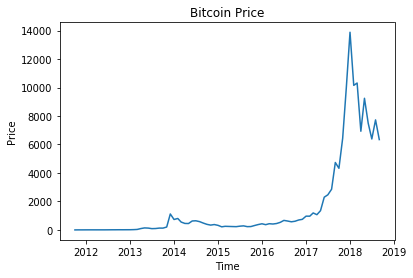

In [12]:
#Visualizing given data
plt.plot(bh['ds'], bh['y'])
plt.title('Bitcoin Price')
plt.ylabel('Price');
plt.xlabel('Time');
plt.show()

In [13]:
#Creating and fitting Model to data 
model = Prophet(interval_width=0.95)
model.fit(bh)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jashw\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
#Creating future dates to predict(for 3 years or 36 months)
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
115,2021-04-01
116,2021-05-01
117,2021-06-01
118,2021-07-01
119,2021-08-01


In [15]:
#Forcasting Future Dates
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
115,2021-04-01,15063.960362,12076.149759,18228.763909
116,2021-05-01,15454.579516,12711.456136,18686.581094
117,2021-06-01,15678.793476,12278.801661,18577.608017
118,2021-07-01,15807.069256,12671.410255,19076.788178
119,2021-08-01,16060.329364,12852.134720,19471.737326


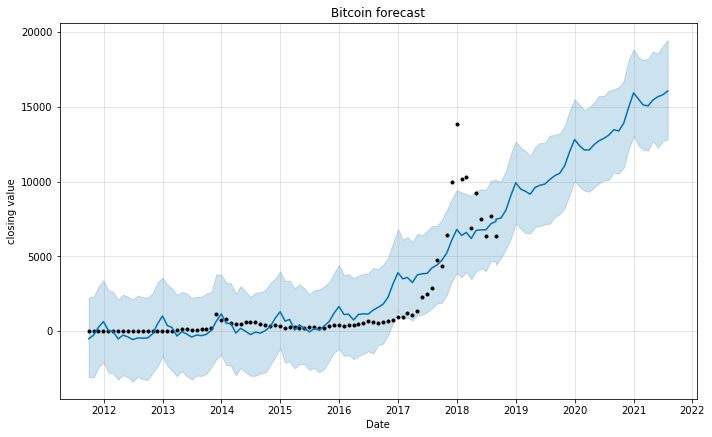

In [16]:
model.plot(forecast, xlabel = 'Date', ylabel = 'closing value', uncertainty=True)
plt.title('Bitcoin forecast')
plt.show();

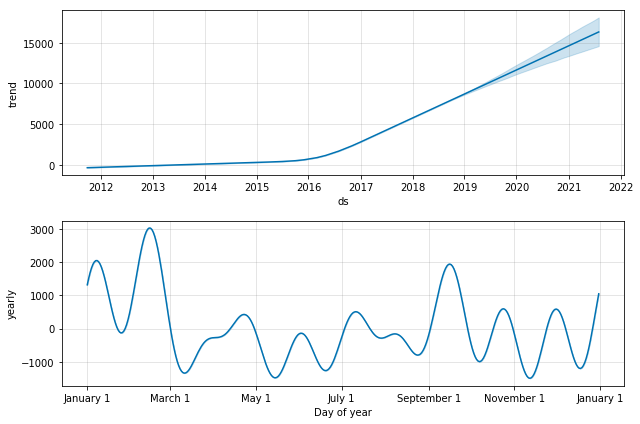

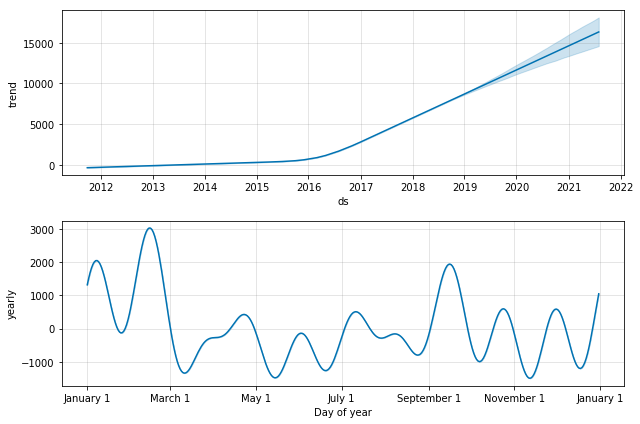

In [17]:
#Visualization in difftent time series
model.plot_components(forecast)

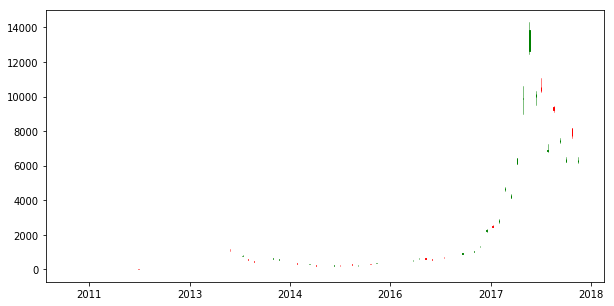

In [20]:
#Candelstick Open High Low Close (OHLC graph) for stock visualization 
import matplotlib.dates as mdates

ohlc= bh[['ds', 'Open', 'High', 'Low','y']].copy()
f1, ax = plt.subplots(figsize = (10,5))
candlestick_ohlc(ax, ohlc.values, width=.8, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
